# Task 1: Retrieving and Preparing the Data

In [1]:
#   imports
import pandas as pd
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
HFCR = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Data Cleaning and checking

### Overall data checking

In [3]:
HFCR.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
#  quick look at the format of the data
HFCR.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
HFCR.dtypes # Get data type for each column & verify they are correct

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# check entire dataset for None types, empty strings, or the NumPy type NaN
missing = False
for feature in HFCR:
    for data in feature:
        if data is None or data == '' or data == np.NaN:
            missing = True
if missing:
    print("There are missing values")
else:
    print("There are no missing values")

There are no missing values


Age

In [7]:
min_age = HFCR["age"].min()
max_age = HFCR["age"].max()
print ("The youngest patient is aged: ", min_age)
print ("The oldest patient is aged: ", min_age)

The youngest patient is aged:  40.0
The oldest patient is aged:  40.0


There are no impossible values in this column since the minimum age surveyed is 40, and the oldest is 95.

### Anaemia

In [8]:
min_ana = HFCR["anaemia"].min()
max_ana = HFCR["anaemia"].max()
print ("The lowest value: ", min_ana)
print ("The highest value: ", max_ana)

The lowest value:  0
The highest value:  1


In [9]:
Error = False
for HFCR["anaemia"] in HFCR:
    for data in HFCR["anaemia"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


By checking the anaemia with using min / max as well as a for loop, we can conclude there are no values other than 0 or
1, which means there are no errors in these boolean values.

### Creatinine Phosphokinase

In [10]:
min_CPK = HFCR["creatinine_phosphokinase"].min()
max_CPK = HFCR["creatinine_phosphokinase"].max()
print ("The lowest value: ", min_CPK)
print ("The highest value: ", max_CPK)

# looking at the IQR of creatinine phosphokinase
Q1 = HFCR["creatinine_phosphokinase"].quantile(0.25)
Q3 = HFCR["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  23
The highest value:  7861
The lower outlier threshold is -581.75 and the upper outlier threshold is 1280.25.


Text(0, 0.5, 'CPK Enzyme (mcg/L')

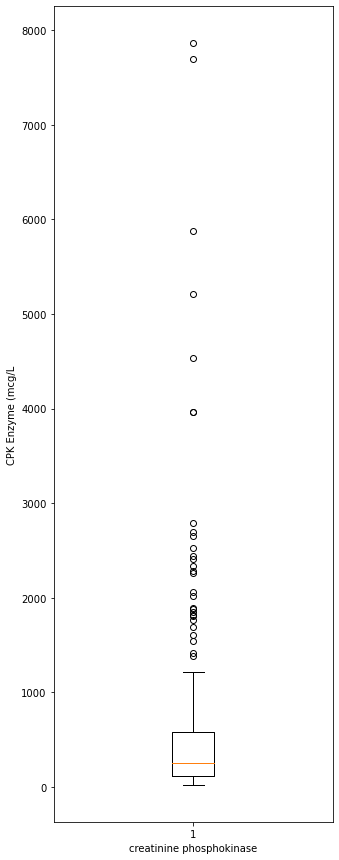

In [11]:

fig = plt.figure(figsize =(5, 15))
plt.boxplot(HFCR["creatinine_phosphokinase"])
plt.xlabel('creatinine phosphokinase')
plt.ylabel('CPK Enzyme (mcg/L')

There appear to be a number of outliers for the level of the CPK enzyme in the blood.

### Diabetes

In [12]:
min_diabetes = HFCR["diabetes"].min()
max_diabetes = HFCR["diabetes"].max()
print ("The lowest value: ", min_diabetes)
print ("The highest value: ", max_diabetes)

The lowest value:  0
The highest value:  1


In [13]:
Error = False
for HFCR["diabetes"] in HFCR:
    for data in HFCR["diabetes"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the anaemia column.

### Ejection fraction

In [14]:
min_EJ = HFCR["ejection_fraction"].min()
max_EJ = HFCR["ejection_fraction"].max()
print ("The lowest value: ", min_EJ)
print ("The highest value: ", max_EJ)

# looking at the IQR of ejection fraction
Q1 = HFCR["ejection_fraction"].quantile(0.25)
Q3 = HFCR["ejection_fraction"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  14
The highest value:  80
The lower outlier threshold is 7.5 and the upper outlier threshold is 67.5.


In [15]:
print("Values over 67: ")
HFCR[['ejection_fraction']][HFCR.ejection_fraction > 67]

Values over 67: 


,ejection_fraction
64,80
217,70


Outliers with over 67% ejection fraction has been found at row 64 and 217 of the dataset.

### High Blood Pressure

In [16]:
min_HBP = HFCR["high_blood_pressure"].min()
max_HBP = HFCR["high_blood_pressure"].max()
print ("The lowest value: ", min_HBP)
print ("The highest value: ", max_HBP)

The lowest value:  0
The highest value:  1


In [17]:
for HFCR["high_blood_pressure"] in HFCR:
    for data in HFCR["high_blood_pressure"]:
        if data == 1 or data == 0:
            Error = True
if Error:
    print("There are values other than 0 or 1")
else:
    print("There are no values other than 0 and 1")

There are no values other than 0 and 1


There are no errors in for the boolean values in the High Blood Pressure column.

### Platelets

In [18]:
min_platelets = HFCR["platelets"].min()
max_platelets = HFCR["platelets"].max()
print ("The lowest value: ", min_platelets)
print ("The highest value: ", max_platelets)

# looking at the IQR of platelets
Q1 = HFCR["platelets"].quantile(0.25)
Q3 = HFCR["platelets"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  25100.0
The highest value:  850000.0
The lower outlier threshold is 76000.0 and the upper outlier threshold is 440000.0.


In [19]:
print("Values below 76000: ")
HFCR[['platelets', 'age']][HFCR.platelets < 76000]

Values below 76000: 


,platelets,age
15,47000.0,82.0
163,75000.0,50.0
167,70000.0,59.0
200,73000.0,63.0
230,62000.0,60.0
277,25100.0,70.0
281,51000.0,70.0


In [20]:
print("Values over 440000: ")
HFCR[['platelets']][HFCR.platelets > 440000]

Values over 440000: 


,platelets
7,454000.0
47,451000.0
55,461000.0
69,497000.0
105,621000.0
109,850000.0
117,507000.0
162,448000.0
212,481000.0
224,504000.0


A number of outliers have been found for the Platelets column.

### Serum Creatinine

In [21]:
min_SC = HFCR["serum_creatinine"].min()
max_SC = HFCR["serum_creatinine"].max()
print ("The lowest value: ", min_SC)
print ("The highest value: ", max_SC)

# looking at the IQR of Serum Creatinine
Q1 = HFCR["serum_creatinine"].quantile(0.25)
Q3 = HFCR["serum_creatinine"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f"The lower outlier threshold is {lower} and the upper outlier threshold is {upper}.")

The lowest value:  0.5
The highest value:  9.4
The lower outlier threshold is 0.15000000000000024 and the upper outlier threshold is 2.1499999999999995.


In [22]:
print("Values above 2.1499999999999995: ")
HFCR[['serum_creatinine']][HFCR.serum_creatinine > 2.1499999999999995]

Values above 2.1499999999999995: 


,serum_creatinine
4,2.7
9,9.4
10,4.0
28,5.8
31,3.0
35,3.5
38,2.3
39,3.0
48,4.4
52,6.8


# Task 2: Data Exploration

In [23]:
#   do stuff here

# Task 3: Data Modelling

In [24]:
#   do stuff here